In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neural_zoo import NeuralZoo
from super_input import SuperInput
from params import default_neuron_params
from soen_sim import input_signal, synapse, neuron, network

### Monosynaptic Point Neuron

In [2]:
times = np.arange(0,150,25)
indices = np.zeros(len(times)).astype(int)
def_spikes = [indices,times]
input = SuperInput(channels=1, type='defined', defined_spikes=def_spikes, duration=150)
default_ib = default_neuron_params['ib_n']

Generating pre-defined input...


[[], []]


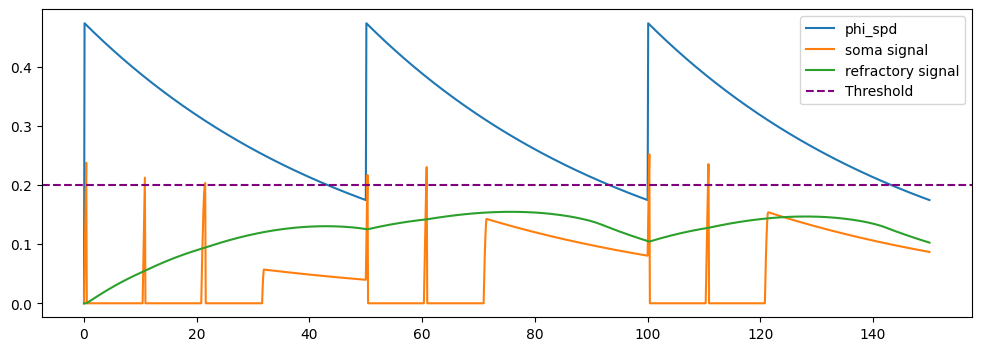

In [3]:
synaptic_structure = [[[1]]]

mono = NeuralZoo(type="custom",synaptic_structure=synaptic_structure,**default_neuron_params)
mono.synapses[0][0][0].add_input(input.signals[0])

net = network(name = 'network_under_test')
net.add_neuron(mono.neuron)
net.run_sim(dt = .1, tf = 150)
net.get_recordings()

spd = mono.synapses[0][0][0].phi_spd
signal = mono.dendrites[0][0][0].s
ref = mono.neuron.dend__ref.s

plt.figure(figsize=(12,4))

plt.plot(net.t,spd, label='phi_spd')
plt.plot(net.t,signal, label='soma signal')
plt.plot(net.t,ref, label='refractory signal')

plt.axhline(y = mono.s_th, color = 'purple', linestyle = '--',label='Threshold')
plt.legend()

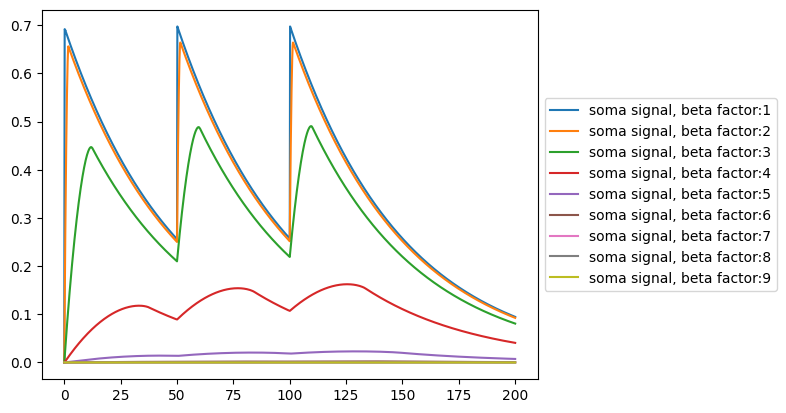

In [4]:
beta_factor = np.arange(1,10,1)
default_neuron_params['s_th'] = 0.75
for b in beta_factor:
    
    default_neuron_params['beta_ni'] = 2*np.pi*(10**b)

    mono = NeuralZoo(type="custom",synaptic_structure=synaptic_structure,**default_neuron_params)
    mono.synapses[0][0][0].add_input(input.signals[0])

    net = network(name = 'network_under_test')
    net.add_neuron(mono.neuron)
    net.run_sim(dt = .01, tf = 200)
    t = mono.neuron.time_params['time_vec']
    signal = mono.dendrites[0][0][0].s
    plt.plot(t,signal, label=f'soma signal, beta factor:{b}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

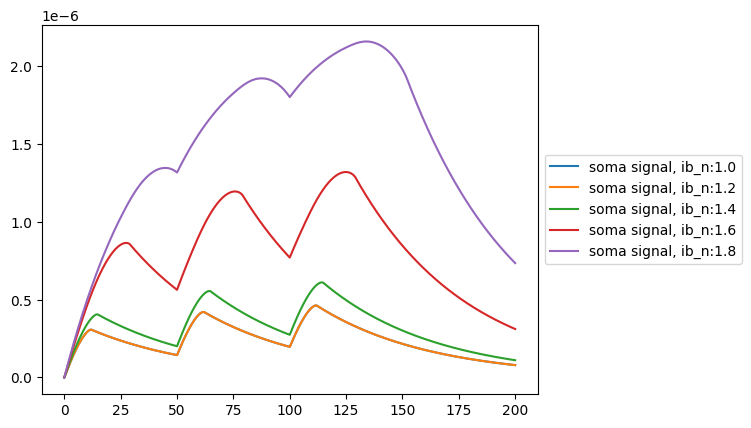

In [5]:
neuron_biases = np.arange(1,2,.2)
default_neuron_params['s_th'] = 0.75
for ib_n in neuron_biases:
    
    default_neuron_params['ib_n'] = ib_n

    mono = NeuralZoo(type="custom",synaptic_structure=synaptic_structure,**default_neuron_params)
    mono.synapses[0][0][0].add_input(input.signals[0])

    net = network(name = 'network_under_test')
    net.add_neuron(mono.neuron)
    net.run_sim(dt = .01, tf = 200)
    t = mono.neuron.time_params['time_vec']
    signal = mono.dendrites[0][0][0].s
    plt.plot(t,signal, label=f'soma signal, ib_n:{np.round(ib_n,2)}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Monosynaptic Neuron with Intermediate Dendrite

[[], []]


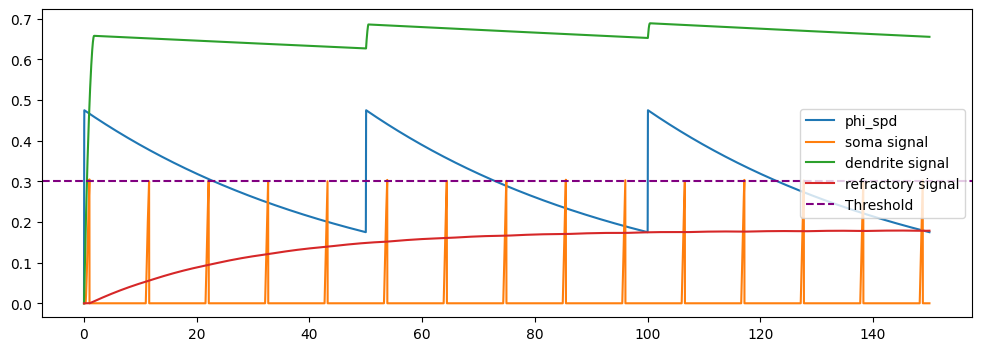

In [8]:
default_neuron_params['beta_ni'] = 2*np.pi*1e2
default_neuron_params['ib_n'] = default_ib
default_neuron_params['s_th'] = 0.3
synaptic_structure = [[[0]],[[1]]]
weights = [[[1]]]
mono_dend = NeuralZoo(type="custom",weights=weights, synaptic_structure=synaptic_structure,**default_neuron_params)

mono_dend.synapses[1][0][0].add_input(input.signals[0])
net = network(name = 'network_under_test')
net.add_neuron(mono_dend.neuron)
net.run_sim(dt = .01, tf = 150)
net.get_recordings()

spd = mono_dend.synapses[1][0][0].phi_spd
signal = mono_dend.dendrites[0][0][0].s
dend_s = mono_dend.dendrites[1][0][0].s
ref = mono_dend.neuron.dend__ref.s

plt.figure(figsize=(12,4))
plt.plot(net.t,spd, label='phi_spd')
plt.plot(net.t,signal, label='soma signal')
plt.plot(net.t,dend_s, label='dendrite signal')
plt.plot(net.t,ref, label='refractory signal')
plt.axhline(y = mono_dend.s_th, color = 'purple', linestyle = '--',label='Threshold')
plt.legend()
plt.show()


### Monosynaptic Neuron with Intermediate Dendrite and Somatic Synaptic Connection

[[], []]
{1: 1}
{'1__dend_refraction': -0.4749633388779212, 'lay0_branch0_den0': 1}
{1: 1}


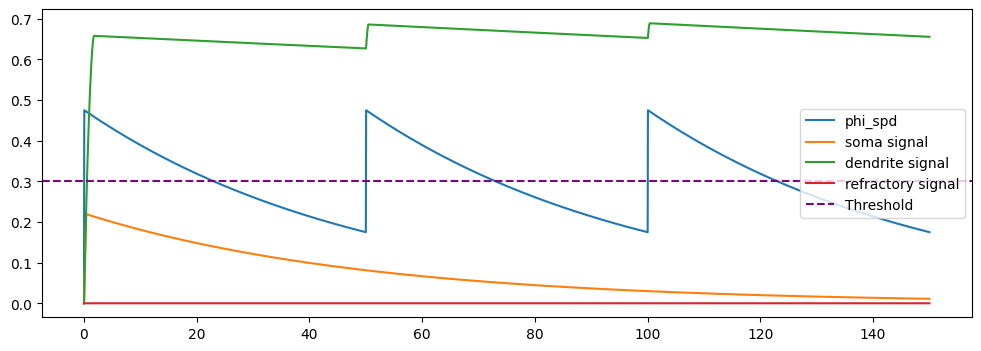

In [29]:
default_neuron_params['beta_ni'] = 2*np.pi*1e2
default_neuron_params['ib_n'] = default_ib
default_neuron_params['s_th'] = 0.3
synaptic_structure = [[[1]],[[1]]]
weights = [[[1]]]
mono_dend_ss = NeuralZoo(type="custom",weights=weights, synaptic_structure=synaptic_structure,**default_neuron_params)

mono_dend_ss.synapses[1][0][0].add_input(input.signals[0])
mono_dend_ss.synapses[0][0][0].add_input(input.signals[0])

net = network(name = 'network_under_test')
net.add_neuron(mono_dend_ss.neuron)
net.run_sim(dt = .01, tf = 150)
net.get_recordings()
print(mono_dend_ss.neuron.dend__nr_ni.synaptic_connection_strengths)
print(mono_dend_ss.neuron.dend__nr_ni.dendritic_connection_strengths)
print(mono_dend_ss.dendrites[1][0][0].synaptic_connection_strengths)
spd = mono_dend_ss.synapses[1][0][0].phi_spd
signal = mono_dend_ss.dendrites[0][0][0].s
dend_s = mono_dend_ss.dendrites[1][0][0].s
ref = mono_dend_ss.neuron.dend__ref.s

plt.figure(figsize=(12,4))
plt.plot(net.t,spd, label='phi_spd')
plt.plot(net.t,signal, label='soma signal')
plt.plot(net.t,dend_s, label='dendrite signal')
plt.plot(net.t,ref, label='refractory signal')
plt.axhline(y = mono_dend_ss.s_th, color = 'purple', linestyle = '--',label='Threshold')
plt.legend()
plt.show()